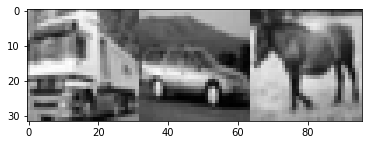

In [60]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        d = pickle.load(fo, encoding='bytes')
    return d

def grayscale(data):
    color_width = data.shape[1] // 3
    red_data, green_data, blue_data = data[:, :1024], data[:, 1024:2048], data[:, 2048:]
    
    return 0.2989 * red_data + 0.5870 * green_data + 0.1140 * blue_data
    
cifar_batch = unpickle('data/cifar10/data_batch_1')
data = cifar_batch[b'data']
labels = cifar_batch[b'labels']

gray_data = grayscale(data)

imgA = gray_data[1,:].reshape((32,32))
imgB = gray_data[4,:].reshape((32,32))
imgC = gray_data[7,:].reshape((32,32))

plt.imshow(np.hstack((imgA, imgB, imgC)), cmap='gray', vmin=0, vmax=255)

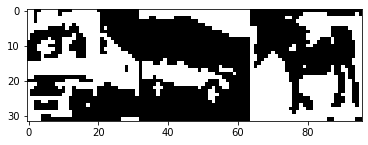

In [61]:
def black_white(img):
    i = np.copy(img)
    return 2 * np.round(i/255, 0) - 1

imgA_bw = black_white(imgA)
imgB_bw = black_white(imgB)
imgC_bw = black_white(imgC)

plt.imshow(np.hstack((imgA_bw, imgB_bw, imgC_bw)), cmap='gray', vmin=-1, vmax=1)

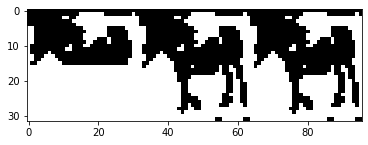

In [231]:
def generate_random_binary_state(size):
    return 2 * np.random.randint(0, 2, (size), dtype=int) - 1

class HopfieldBinary():
    def __init__(self, state_size):
        self.state_size = state_size
        self.num_states = 0
    
        self.T = np.zeros((self.state_size, self.state_size), dtype=int)
        self.sigma = generate_random_binary_state(self.state_size)
        
    def add_pattern(self, pattern):
        p = pattern.reshape(pattern.shape[0], 1)
        pT = pattern.reshape(1, pattern.shape[0])
        
        self.T += np.multiply(p, pT).astype(int)
        #print(f"Added pattern {pattern.astype(int)}")
    
    def update(self):
        update_order = np.arange(self.state_size)
        np.random.shuffle(update_order)

        for i in update_order:
            tmp = np.sum(np.dot(self.T[:,i], self.sigma[:]))
            self.sigma[i] = 2 * (tmp >= 0).astype(int) - 1
            
        return self.sigma
            
    def set_state(self, state):
        self.sigma = state

h = HopfieldBinary(1024)
h.add_pattern(imgA_bw.reshape((1024)))
h.add_pattern(imgB_bw.reshape((1024)))
h.add_pattern(imgC_bw.reshape((1024)))

test_state = generate_random_binary_state(h.state_size)

test_state = np.ones(1024)
test_state[:512] = imgC_bw.reshape((1024))[:512]

states = [np.copy(test_state).reshape((32,32))]
for _ in range(2):
    states.append(np.copy(h.update()).reshape((32,32)))
    
plt.imshow(np.hstack(states), cmap='gray', vmin=-1, vmax=1)

In [62]:
class HopfieldBinaryCubed(HopfieldBinary):
    
    

[[2 2 2 0 2]
 [2 2 2 0 2]
 [2 2 2 0 2]
 [0 0 0 2 0]
 [2 2 2 0 2]]
[-1  1  1 -1  1]
------------------------------------------------------------
[-1  1  1 -1  1]
[-1 -1 -1  1 -1]
